# Get started

## Download forest cover change from TMF

The function `.get_fcc()` can be used to download forest cover change from the Tropical Moist Forest product. We will use the Reunion Island (isocode "REU") as a case study.

In [1]:
import ee
import geefcc

In [2]:
ee.Initialize(project="forestatrisk", opt_url="https://earthengine-highvolume.googleapis.com")

In [19]:
geefcc.get_fcc(
    aoi="REU",
    years=[2000, 2010, 2020],
    source="tmf",
    tile_size=0.5,
    output_file="out_tmf/forest_tmf.tif",
)

get_fcc running, 3 tiles ....

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray
import rioxarray

In [21]:
forest_tmf = rioxarray.open_rasterio("out_tmf/forest_tmf.tif")
forest_tmf

<xarray.DataArray (band: 3, y: 1923, x: 2305)> Size: 13MB
[13297545 values with dtype=int8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 18kB 55.22 55.22 55.22 55.22 ... 55.84 55.84 55.84
  * y            (y) float64 15kB -20.87 -20.87 -20.87 ... -21.39 -21.39 -21.39
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [22]:
fcc_tmf = forest_tmf.sum(dim="band")
fcc_tmf

<xarray.DataArray (y: 1923, x: 2305)> Size: 35MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * x            (x) float64 18kB 55.22 55.22 55.22 55.22 ... 55.84 55.84 55.84
  * y            (y) float64 15kB -20.87 -20.87 -20.87 ... -21.39 -21.39 -21.39
    spatial_ref  int64 8B 0

In [39]:
# Colors
from matplotlib.colors import ListedColormap
cols=[(255, 165, 0, 255), (227, 26, 28, 255), (34, 139, 34, 255)]
colors = [(1, 1, 1, 0)]  # transparent white for 0
cmax = 255.0  # float for division
for col in cols:
    col_class = tuple([i / cmax for i in col])
    colors.append(col_class)
color_map = ListedColormap(colors)

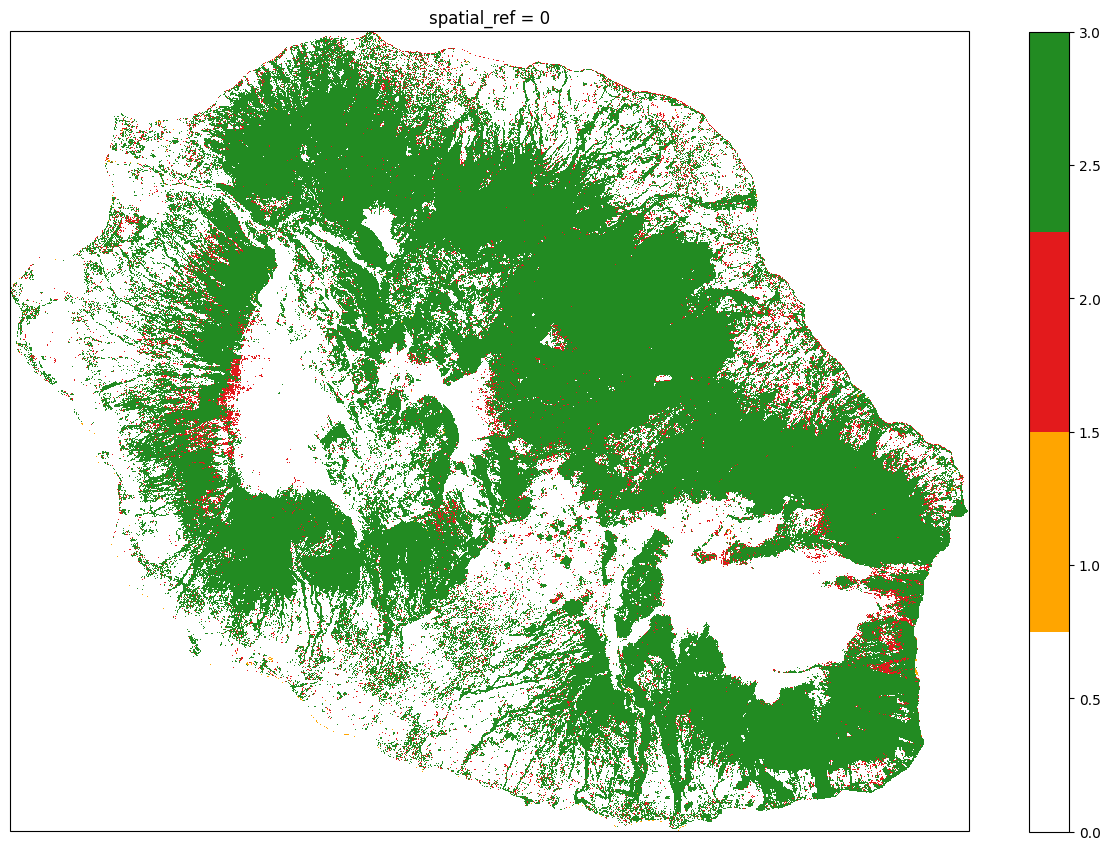

In [43]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0,0,1,1], projection=ccrs.PlateCarree())
raster_image = fcc_tmf.plot(ax=ax, cmap=color_map)
plt.show()

## Compare with forest cover change from GFC

In [44]:
geefcc.get_fcc(
    aoi="REU",
    years=[2001, 2010, 2020],  # Here, first year must be 2001 (1st Jan)
    source="gfc",
    perc=50,
    tile_size=0.5,
    output_file="out_gfc_50/forest_gfc_50.tif",
)

get_fcc running, 3 tiles ....

In [46]:
forest_gfc = rioxarray.open_rasterio("out_gfc_50/forest_gfc_50.tif")
fcc_gfc = forest_gfc.sum(dim="band")

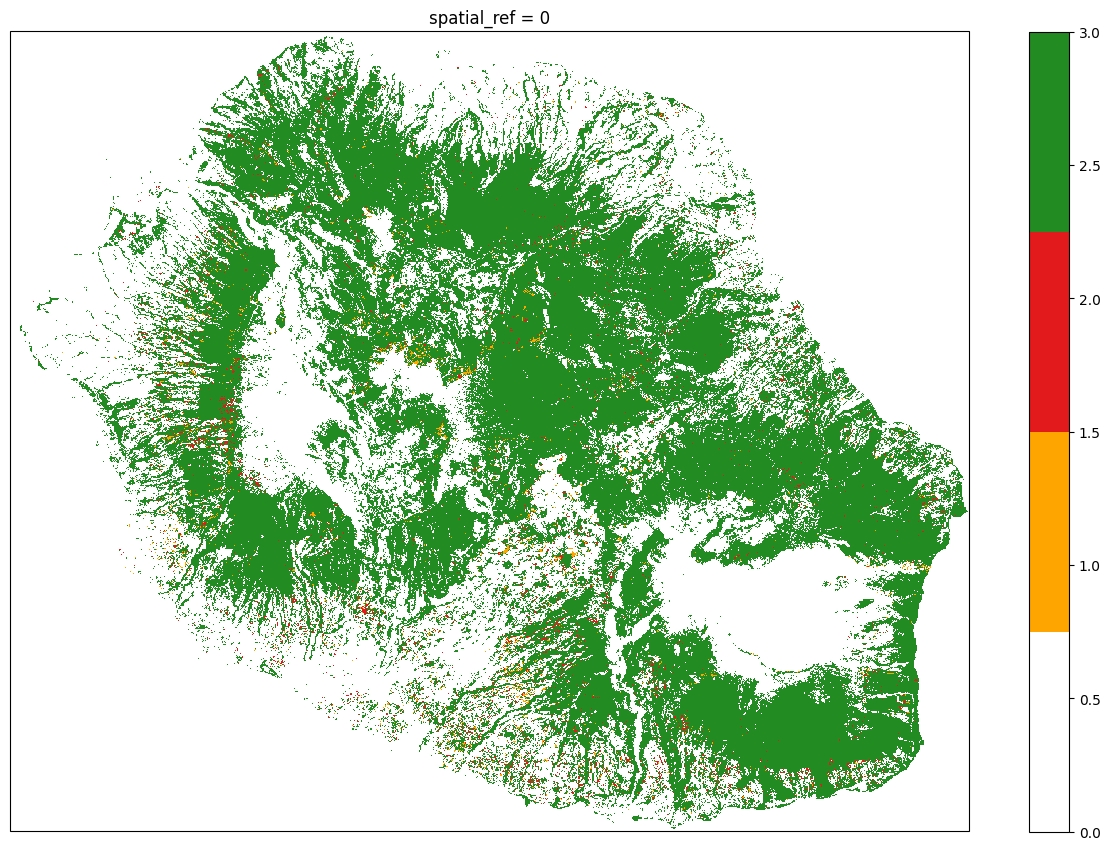

In [47]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0,0,1,1], projection=ccrs.PlateCarree())
raster_image = fcc_gfc.plot(ax=ax, cmap=color_map)
plt.show()